# 10x RNA-seq clustering analysis and annotation (CCN20230722)

The Mouse Whole Brain Atlas is a high-resolution transcriptomic and spatial cell-type atlas across the entire mouse brain, integrating several whole-brain single-cell RNA-sequencing (scRNA-seq) datasets. The datasets contain a total of ~4 million cells passing rigorous quality-control (QC) criteria. The integrated transcriptomic taxonomy contains 5,322 clusters that are organized in a hierarchical manner with nested groupings of 34 classes, 338 subclasses, 1,201 supertypes and 5,322 types/clusters. The scRNA-seq data reveal transcriptome-wide gene expression and co-expression patterns for each cell type. The anatomical location of each cell type has been annotated using a comprehensive brain-wide MERFISH dataset with a total of ~4 million segmented and QC-passed cells, probed with a 500-gene panel and registered to the Allen Mouse Brain Common Coordinate Framework (CCF v3). The MERFISH data not only provide accurate spatial annotation of cell types at subclass, supertype and cluster levels, but also reveal fine-resolution spatial distinctions or gradients for cell types. The combination of scRNA-seq and MERFISH data reveals a high degree of correspondence between transcriptomic identity and spatial specificity for each cell type, as well as unique features of cell type organization in different brain regions.

The purpose of this notebook is to provide an overview of how cluster and cluster annotation information is represented through example use cases.

You need to be connected to the internet to run this notebook and have run through the [getting started notebook](https://alleninstitute.github.io/abc_atlas_access/notebooks/getting_started.html).

A detailed cell type [annotation table](https://allen-brain-cell-atlas.s3-us-west-2.amazonaws.com/metadata/WMB-taxonomy/20230830/cl.df_CCN202307220.xlsx) is also provided along with data downloads detailing information about the hierarchical membership, anatomical annotation, neurotransmitter type, cell type marker genes, transcription factor and neuropeptide markers, and other metadata types for each cluster.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

We will interact with the data using the **AbcProjectCache**. This cache object tracks which data has been downloaded and serves the path to the requsted data on disk. For metadata, the cache can also directly serve a up a Pandas Dataframe. See the ``getting_started`` notebook for more details on using the cache including installing it if it has not already been.

**Change the download_base variable to where you have downloaded the data in your system.**

In [2]:
download_base = Path('../../data/abc_atlas')
abc_cache = AbcProjectCache.from_cache_dir(download_base)

abc_cache.current_manifest

'releases/20241130/manifest.json'

## Data Overview

### Clusters
Each of the final set of 5196 cluster is associated with an alias and label. Each row of the dataframe represnts a ***cluster***. Each *cluster* has a *label* (human readable string that is unique in the database), *cluster alias* (in this case a simple integer) and the *number of cells* that has been grouped into the cluster.

In [3]:
cluster = abc_cache.get_metadata_dataframe(directory='WMB-taxonomy', file_name='cluster')
print(len(cluster))
cluster.head(5)

5322


,cluster_alias,number_of_cells,label
0,1,727,CS20230722_0001
1,10,740,CS20230722_0010
2,100,1053,CS20230722_0100
3,1000,59,CS20230722_1000
4,1001,96,CS20230722_1001


### Cluster annotation term sets
Each level of classification is represented as a ***cluster annotation term set***. Each term set consists of a set of ordered terms. Each term set has a *label* (human readable string that is unique in the database), a *name*, *description* and *order* among the term sets. Note that these are terms specific to the WMB dataset. The WHB dataset contains supercluster, cluster, subcluster, and neurotransmitter. See the WHB cluster annotation tutorial for more information.

In [4]:
term_set = abc_cache.get_metadata_dataframe(directory='WMB-taxonomy', file_name='cluster_annotation_term_set')
term_set

,label,name,description,order
0,CCN20230722_NEUR,neurotransmitter,Clusters are assigned based on the average exp...,0
1,CCN20230722_CLAS,class,The top level of cell type definition in the m...,1
2,CCN20230722_SUBC,subclass,The coarse level of cell type definition in th...,2
3,CCN20230722_SUPT,supertype,The second finest level of cell type definitio...,3
4,CCN20230722_CLUS,cluster,The finest level of cell type definition in th...,4


We can use the pandas iterrows function to print out the description for each term set.

In [5]:
# print out description for each term_set
for tsindex, tsrow in term_set.iterrows() :
    print("%s:\n" % tsrow['name'])
    print("%s\n" % tsrow['description'])

neurotransmitter:

Clusters are assigned based on the average expression of both neurotransmitter transporter genes and key neurotransmitter synthesizing enzyme genes.

class:

The top level of cell type definition in the mouse whole brain taxonomy. It is primarily determined by broad brain region and neurotransmitter type. All cells within a subclass belong to the same class. Class provides a broader categorization of cell types.

subclass:

The coarse level of cell type definition in the mouse whole brain taxonomy. All cells within a supertype belong to the same subclass. Subclass groups together related supertypes.

supertype:

The second finest level of cell type definition in the mouse whole brain taxonomy. All cells within a cluster belong to the same supertype. Supertype groups together similar clusters.

cluster:

The finest level of cell type definition in the mouse whole brain taxonomy. Cells within a cluster share similar characteristics and belong to the same supertype.



### Cluster annotation terms
A ***cluster annotation term*** represents a group within a single level of classification. Each term object has a *label* (human readable string that is unique in the database), a *name*, which *cluster annotation term set* it belongs to and a *parent* or superclass if the term forms a heirarchy, an order within a *term set* and a *color* for visualization purposes.

In [6]:
term = abc_cache.get_metadata_dataframe(directory='WMB-taxonomy', file_name='cluster_annotation_term', keep_default_na=False)
term.head(5)

,label,name,cluster_annotation_term_set_label,parent_term_label,parent_term_set_label,term_set_order,term_order,cluster_annotation_term_set_name,color_hex_triplet
0,CS20230722_NEUR_Glut,Glut,CCN20230722_NEUR,,,0,0,neurotransmitter,#2B93DF
1,CS20230722_NEUR_NA,NA,CCN20230722_NEUR,,,0,1,neurotransmitter,#666666
2,CS20230722_NEUR_GABA,GABA,CCN20230722_NEUR,,,0,2,neurotransmitter,#FF3358
3,CS20230722_NEUR_Dopa,Dopa,CCN20230722_NEUR,,,0,3,neurotransmitter,#fcf04b
4,CS20230722_NEUR_Glut-GABA,Glut-GABA,CCN20230722_NEUR,,,0,4,neurotransmitter,#0a9964


We can use the groupby and count functions in pandas to tally the number of terms in each term set (classification level).

In [7]:
term[['label','cluster_annotation_term_set_name']].groupby('cluster_annotation_term_set_name').count()

,label
cluster_annotation_term_set_name,
class,34
cluster,5322
neurotransmitter,10
subclass,338
supertype,1201


It is important to note that **term names are only unique within a term set and not unique across term sets**. In particular, the name "0001 CLA-EPd-CTX Car3 Glut_1" is used both as supertype and cluster term. These are distinct entities as supertype "0001 CLA-EPd-CTX Car3 Glut_1" has three other distinct cluster members. As such when doing aggregation operations, it is important to the use the term ***label*** instead of ***name***. For the name "0001 CLA-EPd-CTX Car3 Glut_1", the associated label terms are "	CS20230722_SUPT_0001" and "CS20230722_CLUS_000" in the supertype and class level respectively.

In [8]:
# Use the groupby function to find the usage count for each term name
term_name_count = term.groupby(['name'])[['cluster_annotation_term_set_name']].count()
term_name_count.columns = ['usage_count']
pred = term_name_count['usage_count'] > 1
term_name_count = term_name_count[pred]
term_name_count

,usage_count
name,
0001 CLA-EPd-CTX Car3 Glut_1,2


In [9]:
# Filter the dataframe to terms where there was a name reuse
pred = [x in term_name_count.index for x in term['name']]
name_clash_term = term[pred][['label','name','cluster_annotation_term_set_name']]
name_clash_term

,label,name,cluster_annotation_term_set_name
382,CS20230722_SUPT_0001,0001 CLA-EPd-CTX Car3 Glut_1,supertype
1583,CS20230722_CLUS_0001,0001 CLA-EPd-CTX Car3 Glut_1,cluster


In [10]:
# List all clusters which have supertype "0001 CLA-EPd-CTX Car3 Glut_1" as parent
pred = (term['parent_term_label'] == 'CS20230722_SUPT_0001')
term[pred]

,label,name,cluster_annotation_term_set_label,parent_term_label,parent_term_set_label,term_set_order,term_order,cluster_annotation_term_set_name,color_hex_triplet
1583,CS20230722_CLUS_0001,0001 CLA-EPd-CTX Car3 Glut_1,CCN20230722_CLUS,CS20230722_SUPT_0001,CCN20230722_SUPT,4,0,cluster,#00664E
1584,CS20230722_CLUS_0002,0002 CLA-EPd-CTX Car3 Glut_1,CCN20230722_CLUS,CS20230722_SUPT_0001,CCN20230722_SUPT,4,1,cluster,#5C79CC
1585,CS20230722_CLUS_0003,0003 CLA-EPd-CTX Car3 Glut_1,CCN20230722_CLUS,CS20230722_SUPT_0001,CCN20230722_SUPT,4,2,cluster,#86FF4D
1586,CS20230722_CLUS_0004,0004 CLA-EPd-CTX Car3 Glut_1,CCN20230722_CLUS,CS20230722_SUPT_0001,CCN20230722_SUPT,4,3,cluster,#CC563D


### Cluster to cluster annotation membership
The association between a ***cluster*** and ***cluster annotation term*** is represented as a ***cluster to cluster annotation membership*** within the context of one ***cluster annotation term set***. It is expected that a cluster in only associated with one term within a specific term set.

In [11]:
membership = abc_cache.get_metadata_dataframe(directory='WMB-taxonomy', file_name='cluster_to_cluster_annotation_membership')
membership.head(5)

,cluster_annotation_term_label,cluster_annotation_term_set_label,cluster_alias,cluster_annotation_term_name,cluster_annotation_term_set_name,number_of_cells,color_hex_triplet
0,CS20230722_CLUS_0001,CCN20230722_CLUS,128,0001 CLA-EPd-CTX Car3 Glut_1,cluster,4262,#00664E
1,CS20230722_CLUS_0002,CCN20230722_CLUS,129,0002 CLA-EPd-CTX Car3 Glut_1,cluster,3222,#5C79CC
2,CS20230722_CLUS_0003,CCN20230722_CLUS,130,0003 CLA-EPd-CTX Car3 Glut_1,cluster,12216,#86FF4D
3,CS20230722_CLUS_0004,CCN20230722_CLUS,143,0004 CLA-EPd-CTX Car3 Glut_1,cluster,9334,#CC563D
4,CS20230722_CLUS_0005,CCN20230722_CLUS,131,0005 CLA-EPd-CTX Car3 Glut_2,cluster,1056,#E7FF26


## Example use cases
### Aggregating cluster and cells counts per term

We can obtain cluster and cell counts per cluster annotation term using the pandas groupby function.

In [12]:
# Count the number of clusters associated with each cluster annotation term
term_cluster_count = membership.groupby(['cluster_annotation_term_label'])[['cluster_alias']].count()
term_cluster_count.columns = ['number_of_clusters']
term_cluster_count.head(5)

,number_of_clusters
cluster_annotation_term_label,
CS20230722_CLAS_01,402
CS20230722_CLAS_02,83
CS20230722_CLAS_03,16
CS20230722_CLAS_04,16
CS20230722_CLAS_05,105


In [13]:
# Sum up the number of cells associated with each cluster annotation term
term_cell_count = membership.groupby(['cluster_annotation_term_label'])[['number_of_cells']].sum()
term_cell_count.columns = ['number_of_cells']
term_cell_count.head(5)

,number_of_cells
cluster_annotation_term_label,
CS20230722_CLAS_01,1095484
CS20230722_CLAS_02,310198
CS20230722_CLAS_03,4767
CS20230722_CLAS_04,84352
CS20230722_CLAS_05,107502


In [14]:
# Join counts with the term dataframe
term_by_label = term.set_index('label')
term_with_counts = term_by_label.join(term_cluster_count)
term_with_counts = term_with_counts.join(term_cell_count)
term_with_counts[['name', 'cluster_annotation_term_set_name', 'number_of_clusters', 'number_of_cells']].head(5)

,name,cluster_annotation_term_set_name,number_of_clusters,number_of_cells
label,,,,
CS20230722_NEUR_Glut,Glut,neurotransmitter,2561,2054137
CS20230722_NEUR_NA,NA,neurotransmitter,127,1089152
CS20230722_NEUR_GABA,GABA,neurotransmitter,1991,834601
CS20230722_NEUR_Dopa,Dopa,neurotransmitter,67,9396
CS20230722_NEUR_Glut-GABA,Glut-GABA,neurotransmitter,62,8989


The ``term_with_counts`` datafarme is available in the cache as ``cluster_annotation_term_with_counts``.

Let's visualize cluster and cells counts for of the classification levels using bar plots.

In [15]:
def bar_plot_by_level_and_type(df, level, fig_width = 8.5, fig_height = 4):
    
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(fig_width, fig_height)
    
    for idx, ctype in enumerate(['clusters', 'cells']):

        pred = (df['cluster_annotation_term_set_name'] == level )
        names = df[pred]['name']
        counts = df[pred]['number_of_%s' % ctype]
        colors = df[pred]['color_hex_triplet']
        
        ax[idx].barh(names, counts, color=colors)
        ax[idx].set_title('Number of %s by %s' % (ctype,level)),
        ax[idx].set_xscale('log')
        
        if idx > 0 :
            ax[idx].set_yticklabels([])

    plt.show()


#### Neurotransmitter cluster and  cell counts
The majority of clusters and cells are of glutamatergic, GABAergic or GABA-glycinergic neurotransmitter types.

In [16]:
df = term_with_counts
level = 'neurotransmitter'
pred = (df['cluster_annotation_term_set_name'] == level )

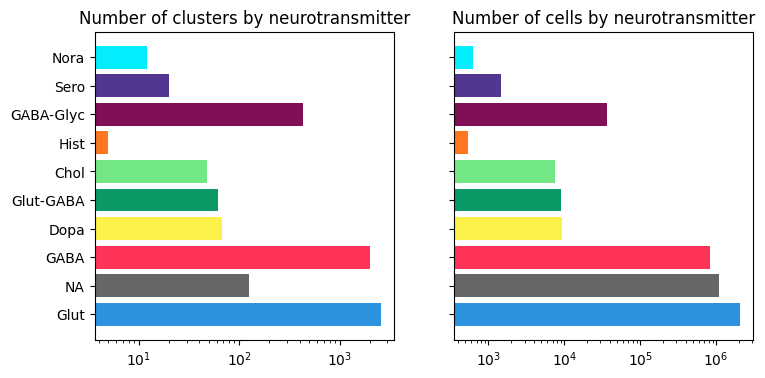

In [17]:
bar_plot_by_level_and_type(term_with_counts, 'neurotransmitter')

#### Class level cluster and cell counts
Class "18 MB Glut" contains the largest number of clusters (>600), while class "01 IT-ET Glut" contains the largest number of cells (>1.0 million).

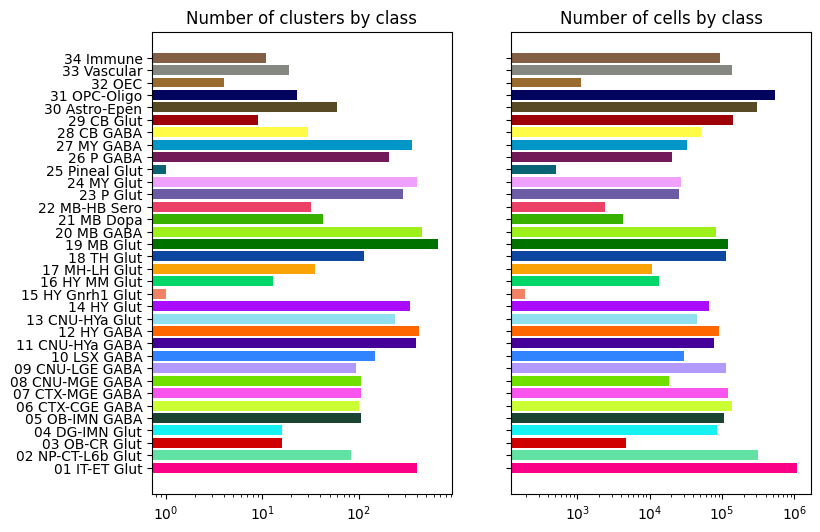

In [18]:
bar_plot_by_level_and_type(term_with_counts, 'class', 8.5, 6)

### Visualizing cluster and term distributions

We can explore the relationship and distribution of clusters between term sets by creating a pivot table using pandas groupby fuunction. Each row of the resulting dataframe represents a cluster, each column represents a term set and the value in the table is the name of the term that has been associated with the cluster for that specific term set.

In [19]:
pivot = membership.groupby(['cluster_alias', 'cluster_annotation_term_set_name'])['cluster_annotation_term_name'].first().unstack()
pivot = pivot[term_set['name']] # order columns
pivot

cluster_annotation_term_set_name,neurotransmitter,class,subclass,supertype,cluster
cluster_alias,,,,,
1,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0326 L2 IT PPP-APr Glut_3
2,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0327 L2 IT PPP-APr Glut_3
3,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0322 L2 IT PPP-APr Glut_2
4,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0323 L2 IT PPP-APr Glut_2
5,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0325 L2 IT PPP-APr Glut_2
...,...,...,...,...,...
34368,GABA-Glyc,27 MY GABA,288 MDRN Hoxb5 Ebf2 Gly-Gaba,1102 MDRN Hoxb5 Ebf2 Gly-Gaba_1,4955 MDRN Hoxb5 Ebf2 Gly-Gaba_1
34372,GABA-Glyc,27 MY GABA,285 MY Lhx1 Gly-Gaba,1091 MY Lhx1 Gly-Gaba_3,4901 MY Lhx1 Gly-Gaba_3
34374,GABA-Glyc,27 MY GABA,285 MY Lhx1 Gly-Gaba,1091 MY Lhx1 Gly-Gaba_3,4902 MY Lhx1 Gly-Gaba_3


We can also obtain a cluster annotation color pivot table in the same way.

In [20]:
color = membership.groupby(['cluster_alias','cluster_annotation_term_set_name'])['color_hex_triplet'].first().unstack().fillna('#f9f9f9')
color = color[term_set['name']] # order columns
color.columns = ['%s_color' % x for x in color.columns]
color

,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cluster_alias,,,,,
1,#2B93DF,#FA0087,#0F6632,#266DFF,#64661F
2,#2B93DF,#FA0087,#0F6632,#266DFF,#CCA73D
3,#2B93DF,#FA0087,#0F6632,#002BCC,#99000D
4,#2B93DF,#FA0087,#0F6632,#002BCC,#5C8899
5,#2B93DF,#FA0087,#0F6632,#002BCC,#473D66
...,...,...,...,...,...
34368,#820e57,#0096C7,#660038,#5CCCA4,#500099
34372,#820e57,#0096C7,#f20985,#976df9,#0F6627
34374,#820e57,#0096C7,#f20985,#976df9,#2E4799


The ``pivot`` and ``color`` dataframes created above are stored in the cache as ``cluster_to_cluster_annotation_membership_pivoted`` and ``cluster_to_cluster_annotation_membership_color`` respectively.

For a given pair of term sets A and B, define a function *distribution* that creates a cluster count table where the rows are terms in term set A, columns are terms in term set B and the table values being the number of clusters that is shared between the terms. 

In [21]:
def distribution(A, B) :
    
    AxB = pivot.groupby([A,B])[['cluster']].count()
    AxB.columns = ['number_of_clusters']
    AxB = AxB.unstack().fillna(0)

    B_names = [x[1] for x in list(AxB.columns)]
    pred = (term['cluster_annotation_term_set_name'] == B)
    term_by_name = term[pred].set_index('name')
    B_colors = term_by_name.loc[B_names, 'color_hex_triplet']
    
    return AxB, B_names, B_colors

Function *stacked_bar_distribution* takes the results of *distribution* as input to create distribution stacked bar plot.


In [22]:
def stacked_bar_distribution(AxB, B_names, B_colors, fig_width = 6, fig_height = 6):

    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)

    bottom = np.zeros(len(AxB))

    for i, col in enumerate(AxB.columns):
        ax.barh(AxB.index, AxB[col], left=bottom, label=col[1], color=B_colors[i])
        bottom += np.array(AxB[col])

    ax.set_title('Distribution of %s in each %s' % (AxB.columns.names[1], AxB.index.name))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()
    
    return fig, ax

#### Distribution of neurotransmitter clusters in each class

At the next level of classification, around 50% of the classes are have a single neurotransmitter identity and remaining 50% are of mixed types.

/var/folders/kc/7glrmt5n67x16yj_tg86t49c0000gp/T/ipykernel_59350/1772253940.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.barh(AxB.index, AxB[col], left=bottom, label=col[1], color=B_colors[i])


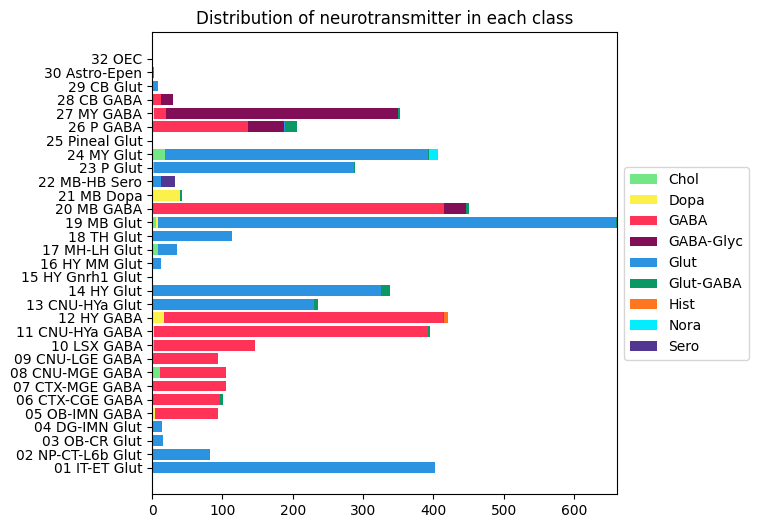

In [23]:
AxB, B_names, B_colors = distribution('class', 'neurotransmitter')
fig, ax = stacked_bar_distribution(AxB, B_names, B_colors, 6, 6)

### Visualizing the mouse whole brain taxonomy

Term sets: class, subclass, supertype and cluster forms a four level mouse whole brain taxonomy. We can visualized the taxonomy as a sunburst diagram that shows the single inheritance hierarchy through a series of rings, that are sliced for each annotation term. Each ring corresponds to a level in the hierarchy. We have ordered the rings so that the class level is the outer most ring so that we can add in labels. Rings are sliced up and divided based on their hierarchical relationship to the parent slice. The angle of each slice is proportional to the number of clusters belonging to the term.

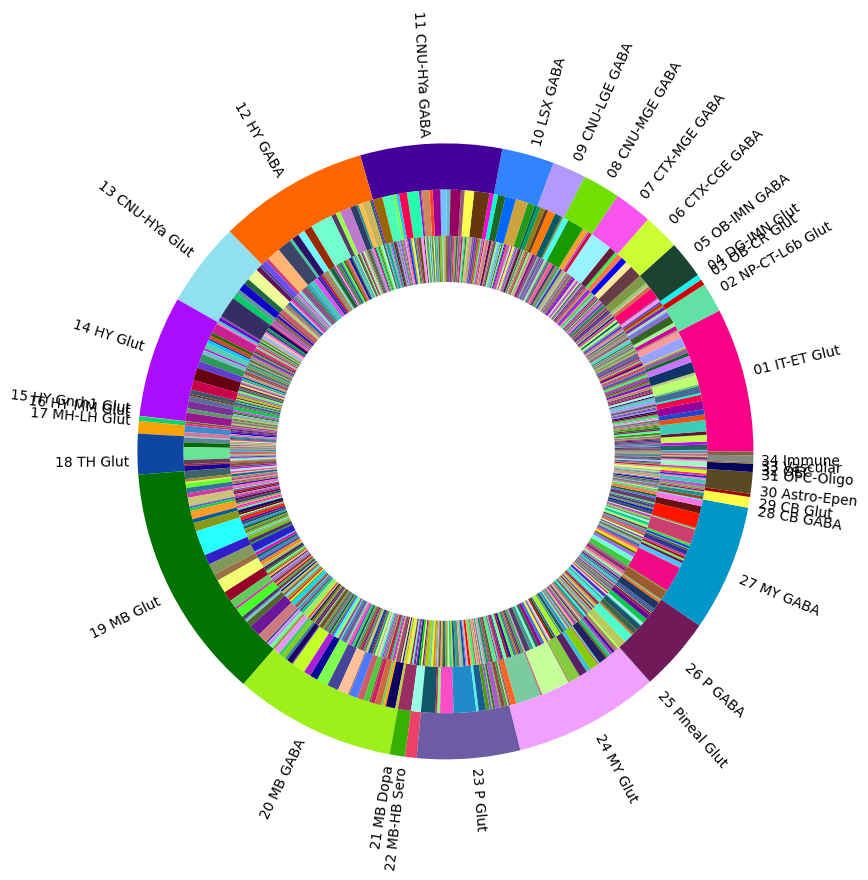

In [24]:
levels = ['class', 'subclass', 'supertype']
df = {}

for lvl in levels:
    pred = term_with_counts['cluster_annotation_term_set_name'] == lvl
    df[lvl] = term_with_counts[pred]
    df[lvl] = df[lvl].sort_values(['parent_term_label', 'label'])

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
size = 0.15

for i, lvl in enumerate(levels):
    
    if lvl == 'class':
        ax.pie(df[lvl]['number_of_clusters'],
               colors=df[lvl]['color_hex_triplet'],
               labels = df[lvl]['name'],
               rotatelabels=True,
               labeldistance=1.025,
               radius=1,
               wedgeprops=dict(width=size, edgecolor=None),
               startangle=0)
    else :
        ax.pie(df[lvl]['number_of_clusters'],
               colors=df[lvl]['color_hex_triplet'],
               radius=1-i*size,
               wedgeprops=dict(width=size, edgecolor=None),
               startangle=0)

plt.show()